<a href="https://colab.research.google.com/github/kd0176/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank Stock Closing Price Prediction**



##### **Project Type -**     Regression


# **Problem Statement**


### 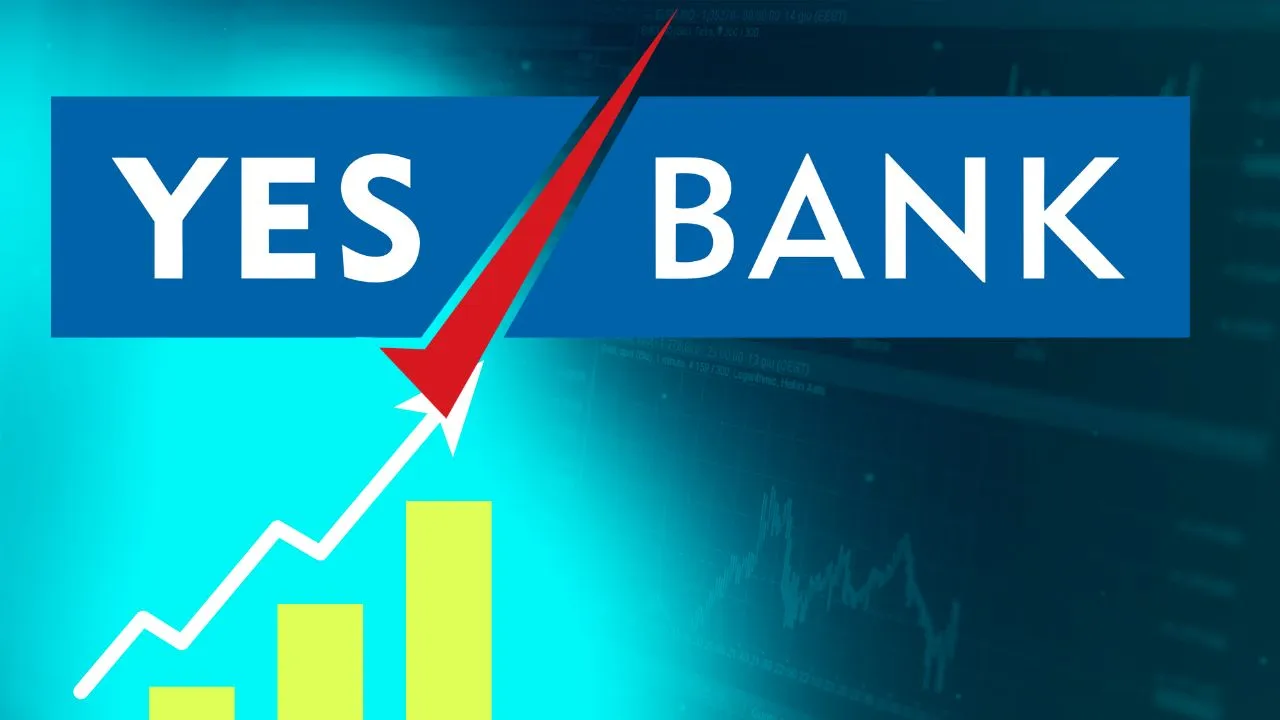Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















-----

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries
import numpy as np                                   # numerical computations
import pandas as pd                                  # data analyze

import seaborn as sns                                # data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                      # Ignore warnings
warnings.filterwarnings("ignore")

from datetime import datetime                        # To play with datetime object

from scipy.stats import uniform                      # For hypothesis testing
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f



### Dataset Loading

In [13]:
# Load Dataset
url='https://drive.google.com/file/d/1QE_J9JP9tFgFgzCNOfPt99uaPn08ZpbP/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Dataset First View

In [14]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Date,Open,High,Low,Close


#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'Visualizing the missing values')

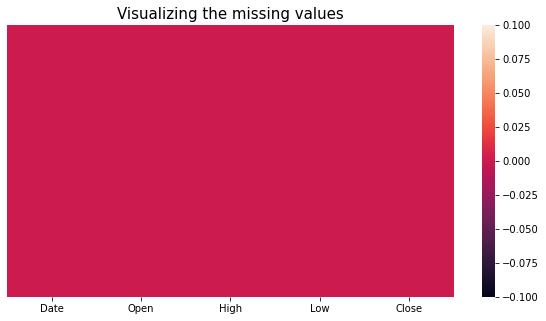

In [19]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

*   There are 185 rows and 5 columns in the dataset
*   No duplicate rows.
*   No missing values in the dataset.


-----

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [21]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

* **Date :** Date of record.

* **Open :** Opening price.

* **High :** Highest price in the month.

* **Low :** Lowest price in the month.

* **Close :** Closing price.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("unique value count in",i,"is",df[i].nunique())

unique value count in Date is 185
unique value count in Open is 183
unique value count in High is 184
unique value count in Low is 183
unique value count in Close is 185


-----

## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.

# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [24]:
# Extract year from date column
df['Year'] = df['Date'].dt.year

In [25]:
# Extract month from date column
df['Month'] = df['Date'].dt.month

In [26]:
# Extract month from date column
df['Quarter'] = df['Date'].dt.quarter

In [27]:
# check unique values for 'Year' column
df['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [28]:
# check unique values for 'Year' column
df['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [29]:
# check unique values for 'Year' column
df['Quarter'].unique()

array([3, 4, 1, 2])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     185 non-null    datetime64[ns]
 1   Open     185 non-null    float64       
 2   High     185 non-null    float64       
 3   Low      185 non-null    float64       
 4   Close    185 non-null    float64       
 5   Year     185 non-null    int64         
 6   Month    185 non-null    int64         
 7   Quarter  185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 11.7 KB


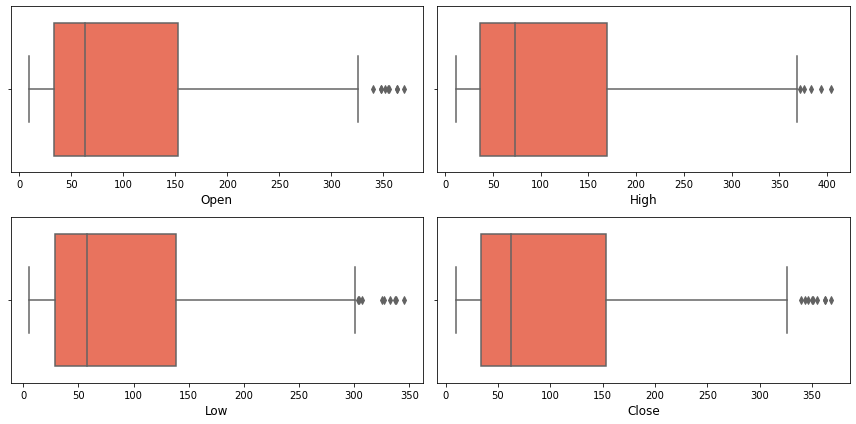

In [31]:
# check for outliers in 'Open' , 'High', 'Low' and 'Close' columns
fig = plt.figure(figsize=(12,6))
c=1
for i in ['Open' , 'High', 'Low', 'Close'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout()

In [32]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [33]:
# find outliers in percentage
for i in ['Open' , 'High', 'Low', 'Close']:
  outliers = find_outliers_IQR(df[i])
  outliers_percent = round((outliers.size/df[i].size)*100, 2)
  print(f'{i} : {outliers_percent}%')

Open : 4.86%
High : 2.7%
Low : 4.86%
Close : 4.86%


In [34]:
# find outliers
for i in ['Open' , 'High', 'Low', 'Close']:
  outliers = find_outliers_IQR(df[i])
  print(f'{i} : ')
  print(outliers)

Open : 
145    363.00
146    351.00
147    354.60
151    355.00
154    362.85
155    348.00
156    340.00
157    369.95
158    347.20
Name: Open, dtype: float64
High : 
144    372.00
146    383.25
147    375.75
156    393.35
157    404.00
Name: High, dtype: float64
Low : 
145    337.37
146    345.50
150    307.35
151    304.65
153    303.30
154    325.70
155    327.35
156    332.45
157    338.00
Name: Low, dtype: float64
Close : 
144    361.96
145    351.15
146    350.00
150    354.45
153    362.05
154    346.20
155    339.60
156    367.90
157    343.40
Name: Close, dtype: float64


* all the outliers are from row index 144 to 157

In [35]:
# analyze outliers
df[144:158]

,Date,Open,High,Low,Close,Year,Month,Quarter
144,2017-07-01,293.04,372.00,290.78,361.96,2017,7,3
145,2017-08-01,363.00,368.52,337.37,351.15,2017,8,3
146,2017-09-01,351.00,383.25,345.50,350.00,2017,9,3
147,2017-10-01,354.60,375.75,299.00,314.35,2017,10,4
148,2017-11-01,315.50,329.80,296.00,306.80,2017,11,4
149,2017-12-01,307.20,319.00,300.65,315.05,2017,12,4
150,2018-01-01,314.00,366.00,307.35,354.45,2018,1,1
151,2018-02-01,355.00,366.50,304.65,322.25,2018,2,1
152,2018-03-01,320.70,325.80,285.10,304.90,2018,3,1
153,2018-04-01,305.00,368.75,303.30,362.05,2018,4,2


-----observation-----
* From the above boxplots it seems like there are some outliers in the dataset.
* But when we calculated the percentage we found that one 'High' column has more than 2.5 percent and all the other 3 columns have almost same which is 4.86 percent outliers and we can't consider more than 2 and 4 perecent of data as outliers blindly.
* We know that these are stock prices, and all the outliers in all 4 columns are almost similar which is more than 300.
* From all the above points we can say that these are not outliers , these are possible values. 
* and we also cross checked the prices on google of 'Yes Bank stock' in 2017 and 2018 as the outliers data belongs to these years.

In [36]:
# check min, max and mean prices for each year 
df.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                        High                         Low          \
         min     max        mean     min     max        mean     min     max   
Year                                                                           
2005   12.58   13.49   13.183333   13.88   14.88   14.423333   11.25   13.00   
2006   13.68   25.40   18.401667   16.97   29.66   21.090833   13.40   24.40   
2007   27.00   46.40   35.160833   31.58   54.00   39.743333   23.31   45.00   
2008   12.40   50.88   31.292500   16.56   55.56   34.330833   11.01   44.40   
2009   10.00   50.98   26.940833   11.24   55.67   32.678333    8.16   48.60   
2010   47.80   72.20   57.946667   51.48   77.60   63.508333   44.60   68.21   
2011   51.84   63.00   58.865000   57.69   68.26   63.341667   46.71   61.36   
2012   47.92   89.20   70.648333   66.50   95.00   77.577500   46.11   88.01   
2013   49.20  104.41   82.608333   67.81  109.43   92.748333   43.22   97.20   
2014   60.52  142.08  100.463333   62.70  155.00  112.439167   58.42  134.00   
2015  135.61  177.00  161.141667  154.52  182.00  169.394167  118.00  158.90   
2016  138.80  273.30  207.124167  149.90  290.00  224.225833  126.45  245.80   
2017  231.98  363.00  309.131667  284.31  383.25  333.800833  226.30  345.50   
2018  174.00  369.95  300.725000  194.30  404.00  331.920833  147.00  338.00   
2019   42.00  277.00  137.000000   70.50  285.90  155.858333   29.05  228.80   
2020   12.00   46.90   25.150909   14.01   87.95   32.805455    5.55   36.55   

                   Close                      
            mean     min     max        mean  
Year                                          
2005   12.391667   12.46   13.71   13.215000  
2006   16.903333   15.33   26.97   19.350000  
2007   31.830000   28.14   49.81   36.873333  
2008   23.335000   12.26   50.54   28.252500  
2009   24.275833    9.98   53.41   30.032500  
2010   53.880833   47.32   71.86   58.645833  
2011   52.275833   47.72   62.90   57.223333  
2012   67.428333   65.97   92.84   74.281667  
2013   72.990833   48.65  104.41   80.585000  
2014   94.627500   60.95  154.57  106.947500  
2015  146.293333  137.90  176.52  160.112500  
2016  193.472500  137.67  272.56  213.524167  
2017  292.530833  279.10  361.96  315.306667  
2018  263.820833  169.65  367.90  288.637500  
2019  106.687500   41.45  275.05  125.262500  
2020   18.797273   11.95   39.20   22.105455

In [37]:
# check min, max and mean prices for each Month 
df.groupby('Month').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                       High                        Low          \
         min     max        mean    min     max        mean    min     max   
Month                                                                        
1      13.68  314.00  100.928000  17.16  366.00  117.346667  11.48  307.35   
2      12.19  355.00  109.134667  12.50  366.50  116.035333   9.90  304.65   
3      10.00  320.70  108.150667  11.24  325.80  123.670667   5.55  285.10   
4      10.04  309.60  113.044000  17.51  368.75  125.709333   9.94  303.30   
5      15.94  362.85  114.589333  21.80  364.40  122.090000  14.76  325.70   
6      18.20  348.00  113.268000  18.40  350.10  118.471333  13.40  327.35   
7      13.00  340.00  103.891250  14.00  393.35  117.493750  11.10  332.45   
8      12.00  369.95  108.481875  14.88  404.00  116.064375  11.85  338.00   
9      13.48  351.00  103.691875  14.87  383.25  114.283750  12.27  345.50   
10     13.20  354.60   93.815625  14.01  375.75  109.928125  11.01  299.00   
11     12.41  315.50   97.975000  13.88  329.80  105.645000  11.25  296.00   
12     12.40  307.20  100.850000  14.44  319.00  107.654000  11.13  300.65   

                   Close                      
             mean    min     max        mean  
Month                                         
1       93.766000  12.24  354.45  108.774667  
2       98.238667  10.26  322.25  107.760667  
3       98.524000   9.98  309.82  113.014000  
4      102.284667  15.45  362.05  114.450000  
5      102.404667  18.03  346.20  112.874667  
6      102.642000  15.62  339.60  109.661333  
7       96.206250  11.95  367.90  108.322500  
8       95.777500  13.42  351.15  103.386875  
9       85.735625  13.15  350.00   93.343750  
10      85.361875  12.42  314.35   97.399375  
11      87.251875  12.26  306.80   94.671250  
12      92.808000  13.71  315.05  100.724000

In [38]:
# check min, max and mean prices for each Quarter 
df.groupby('Quarter').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                       High                        Low          \
           min     max        mean    min     max        mean    min     max   
Quarter                                                                        
1        10.00  355.00  106.071111  11.24  366.50  119.017556   5.55  307.35   
2        10.04  362.85  113.633778  17.51  368.75  122.090222   9.94  327.35   
3        12.00  369.95  105.355000  14.00  404.00  115.947292  11.10  345.50   
4        12.40  354.60   97.476596  13.88  375.75  107.744255  11.01  300.65   

                     Close                      
               mean    min     max        mean  
Quarter                                         
1         96.842889   9.98  354.45  109.849778  
2        102.443778  15.45  362.05  112.328667  
3         92.573125  11.95  367.90  101.684375  
4         88.381702  12.26  315.05   97.531702

### What all manipulations have you done and insights you found?

* we have converted the string object to date for date column.
* we have extracted the year from **'Date'** and created a seprate **'Year'** column.
* Also created **'Month'** and **'Quarter'** variable from date.
* checked for **outliers** and found out there is no outlier in the dataset.
* And also there is no Null values.


----

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***